# classic time series modeling

This is the code for TS modeling

In [7]:
import pandas as pd
import numpy as np

project_path = '/Users/chizhang/Documents/GitHub/piepy/'
path = 'data/Rainfall_data.csv'

# load data
df = pd.read_csv(project_path + path)
df.head()

,Year,Month,Day,Specific Humidity,Relative Humidity,Temperature,Precipitation
0,2000,1,1,8.06,48.25,23.93,0.00
1,2000,2,1,8.73,50.81,25.83,0.11
2,2000,3,1,8.48,42.88,26.68,0.01
3,2000,4,1,13.79,55.69,22.49,0.02
4,2000,5,1,17.40,70.88,19.07,271.14


In [8]:
# merge and produce time stamps
df['Timestamp'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
df.head(1)

len(df.columns) # now it's 7

df = df.set_index('Timestamp')
df = df.sort_values(by = 'Timestamp')
# drop the first three
df = df.drop(['Year', 'Month', 'Day'], axis = 1)

df.head()

,Specific Humidity,Relative Humidity,Temperature,Precipitation
Timestamp,,,,
2000-01-01,8.06,48.25,23.93,0.00
2000-02-01,8.73,50.81,25.83,0.11
2000-03-01,8.48,42.88,26.68,0.01
2000-04-01,13.79,55.69,22.49,0.02
2000-05-01,17.40,70.88,19.07,271.14


Now it is time to visualize


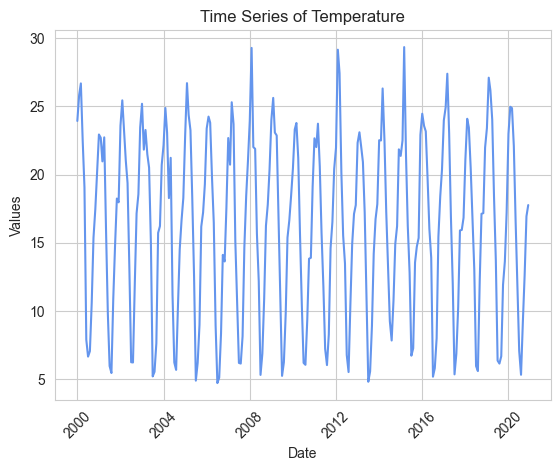

In [9]:
import seaborn as sns # Visualization
import matplotlib.pyplot as plt

# if want to plot one by one,
sns.lineplot(x="Timestamp", y="Temperature", data=df, color = 'cornflowerblue')
plt.title("Time Series of Temperature")
plt.xlabel("Date")
plt.ylabel("Values")
plt.xticks(rotation=45)

plt.show()

In [1]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # standard scaler
from sklearn.metrics import mean_squared_error
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

Configure the model

In [10]:
# Split data into train and test sets
train_size = int(len(df) * 0.8)
print(train_size)
train, test = df[:train_size], df[train_size:]

# Scale the features
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

201


In [11]:
df.columns.to_list()
features = ['Specific Humidity', 'Relative Humidity', 'Temperature']
target = 'Precipitation'

## Arima model

In [12]:
# ARIMA Model
order = (1, 1, 1)
arima_model = SARIMAX(train[target], order=order)
arima_result = arima_model.fit(disp=False)
arima_pred = arima_result.get_forecast(steps=len(test)).predicted_mean
arima_mse = mean_squared_error(test[target], arima_pred)

print(f'ARIMA MSE: {arima_mse}')

ARIMA MSE: 124136.7777110838


/Users/chizhang/.pyenv/versions/mypydev312/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/chizhang/.pyenv/versions/mypydev312/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/chizhang/.pyenv/versions/mypydev312/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/chizhang/.pyenv/versions/mypydev312/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parame

In [15]:
# SARIMA Model
order_sarima = (1, 1, 1, 12)
sarima_model = SARIMAX(train[target], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit(disp=False)
sarima_pred = sarima_result.get_forecast(steps=len(test)).predicted_mean

sarima_mse = mean_squared_error(test[target], sarima_pred)
print(f'SARIMA MSE: {sarima_mse}')

/Users/chizhang/.pyenv/versions/mypydev312/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/chizhang/.pyenv/versions/mypydev312/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA MSE: 22333.027259144448


In [19]:
# Exponential Smoothing Model
exp_smoothing_model = ExponentialSmoothing(train[target], trend='add', seasonal='add', seasonal_periods=12)
exp_smoothing_result = exp_smoothing_model.fit()
exp_smoothing_pred = exp_smoothing_result.forecast(steps=len(test))

exp_smoothing_mse = mean_squared_error(test[target], exp_smoothing_pred)
print(f'Exponential Smoothing MSE: {exp_smoothing_mse}')

Exponential Smoothing MSE: 20939.37140916768


/Users/chizhang/.pyenv/versions/mypydev312/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


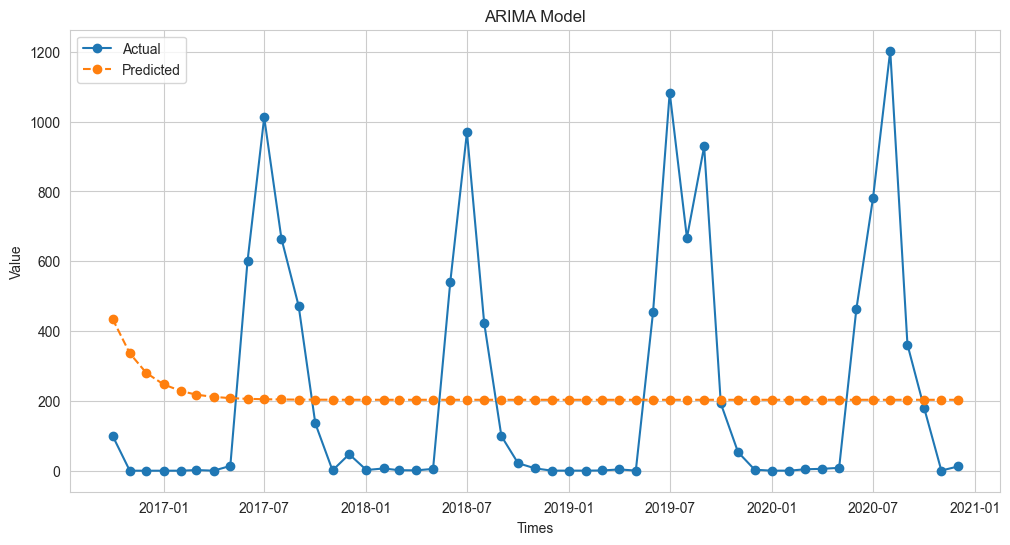

In [20]:
# plot the figures
# plot_predictions(test[target], arima_pred, 'ARIMA Model')
# plot_predictions(test[target], sarima_pred, 'SARIMA Model')
# plot_predictions(test[target], exp_smoothing_pred, 'Exponential Smoothing Model')
def plot_predictions(actual, pred, title):
    plt.figure(figsize=(12, 6))
    plt.plot(actual.index, actual, label='Actual', marker='o')
    plt.plot(pred.index, pred, label='Predicted', linestyle='dashed', marker='o')
    plt.title(title)
    plt.xlabel('Times')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

plot_predictions(test[target], arima_pred, 'ARIMA Model')